EDA - Modelo de recomendación

Importamos las librerías

In [45]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
sns.set()

Cargamos el DataFrame

In [46]:
df = pd.read_csv(r'games.csv')

In [47]:
df.head(10)

,publisher,genres,app_name,title,url,release_date,tags,reviews_url,specs,price,early_access,id,developer,release_date_anio
0,Kotoshiro,Action,Lost Summoner Kitty,Lost Summoner Kitty,http://store.steampowered.com/app/761140/Lost_...,2018-01-04,"['Strategy', 'Action', 'Indie', 'Casual', 'Sim...",http://steamcommunity.com/app/761140/reviews/?...,['Single-player'],4.99,False,761140,Kotoshiro,2018.0
1,Kotoshiro,Casual,Lost Summoner Kitty,Lost Summoner Kitty,http://store.steampowered.com/app/761140/Lost_...,2018-01-04,"['Strategy', 'Action', 'Indie', 'Casual', 'Sim...",http://steamcommunity.com/app/761140/reviews/?...,['Single-player'],4.99,False,761140,Kotoshiro,2018.0
2,Kotoshiro,Indie,Lost Summoner Kitty,Lost Summoner Kitty,http://store.steampowered.com/app/761140/Lost_...,2018-01-04,"['Strategy', 'Action', 'Indie', 'Casual', 'Sim...",http://steamcommunity.com/app/761140/reviews/?...,['Single-player'],4.99,False,761140,Kotoshiro,2018.0
3,Kotoshiro,Simulation,Lost Summoner Kitty,Lost Summoner Kitty,http://store.steampowered.com/app/761140/Lost_...,2018-01-04,"['Strategy', 'Action', 'Indie', 'Casual', 'Sim...",http://steamcommunity.com/app/761140/reviews/?...,['Single-player'],4.99,False,761140,Kotoshiro,2018.0
4,Kotoshiro,Strategy,Lost Summoner Kitty,Lost Summoner Kitty,http://store.steampowered.com/app/761140/Lost_...,2018-01-04,"['Strategy', 'Action', 'Indie', 'Casual', 'Sim...",http://steamcommunity.com/app/761140/reviews/?...,['Single-player'],4.99,False,761140,Kotoshiro,2018.0
5,"Making Fun, Inc.",Free to Play,Ironbound,Ironbound,http://store.steampowered.com/app/643980/Ironb...,2018-01-04,"['Free to Play', 'Strategy', 'Indie', 'RPG', '...",http://steamcommunity.com/app/643980/reviews/?...,"['Single-player', 'Multi-player', 'Online Mult...",0.00,False,643980,Secret Level SRL,2018.0
6,"Making Fun, Inc.",Indie,Ironbound,Ironbound,http://store.steampowered.com/app/643980/Ironb...,2018-01-04,"['Free to Play', 'Strategy', 'Indie', 'RPG', '...",http://steamcommunity.com/app/643980/reviews/?...,"['Single-player', 'Multi-player', 'Online Mult...",0.00,False,643980,Secret Level SRL,2018.0
7,"Making Fun, Inc.",RPG,Ironbound,Ironbound,http://store.steampowered.com/app/643980/Ironb...,2018-01-04,"['Free to Play', 'Strategy', 'Indie', 'RPG', '...",http://steamcommunity.com/app/643980/reviews/?...,"['Single-player', 'Multi-player', 'Online Mult...",0.00,False,643980,Secret Level SRL,2018.0
8,"Making Fun, Inc.",Strategy,Ironbound,Ironbound,http://store.steampowered.com/app/643980/Ironb...,2018-01-04,"['Free to Play', 'Strategy', 'Indie', 'RPG', '...",http://steamcommunity.com/app/643980/reviews/?...,"['Single-player', 'Multi-player', 'Online Mult...",0.00,False,643980,Secret Level SRL,2018.0
9,Poolians.com,Casual,Real Pool 3D - Poolians,Real Pool 3D - Poolians,http://store.steampowered.com/app/670290/Real_...,2017-07-24,"['Free to Play', 'Simulation', 'Sports', 'Casu...",http://steamcommunity.com/app/670290/reviews/?...,"['Single-player', 'Multi-player', 'Online Mult...",0.00,False,670290,Poolians.com,2017.0


1. Analizamos a través de un grafico de barras los géneros de los juegos, que serán uno de los inputs del modelo de recomendación

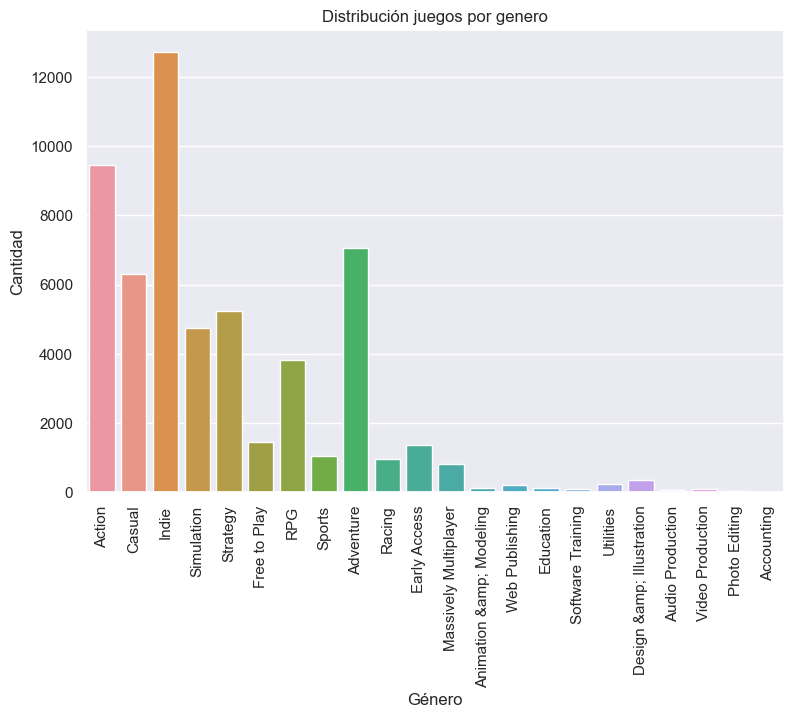

In [48]:
plt.figure(figsize=(9, 6))
sns.countplot(x='genres', data=df)
plt.xticks(rotation=90)
plt.xlabel('Género')
plt.ylabel('Cantidad')
plt.title('Distribución juegos por genero')
plt.show()

Como podemos observar el mayor numero de juegos corresponde a la categoría Indie, seguido de Action y Adventure, podemos inferir que los juegos (Items) que nos recomendara estarán orientados a estos géneros de juego. También nos indica la preferencia de los usuarios es directamente proporcional a los géneros.

2. Ahora miraremos una relación de juegos por precio y gratuitos, esto nos permite ver como puede estar distribuida nuestra recomendación de juegos y lo importante que puede ser el precio.

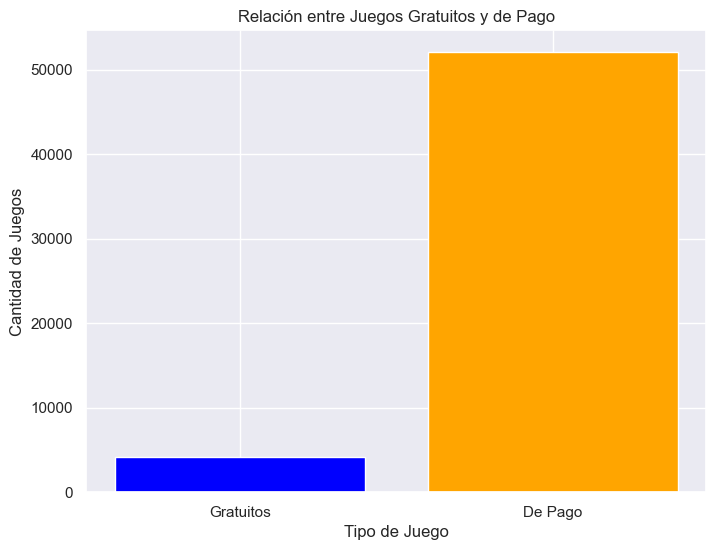

In [49]:
free_games = df[df['price'] == 0]
paid_games = df[df['price'] > 0]

plt.figure(figsize=(8, 6))
plt.bar(['Gratuitos', 'De Pago'], [len(free_games), len(paid_games)], color=['blue', 'orange'])
plt.xlabel('Tipo de Juego')
plt.ylabel('Cantidad de Juegos')
plt.title('Relación entre Juegos Gratuitos y de Pago')
plt.show()

Es muy interesante darse cuenta que definitivamente en nuestro modelo de recomendación la variable precio no juega un papel relevante y confirma que la misma no es un determinante de la recomendación.

3. Ahora miraremos los outliers de los precios

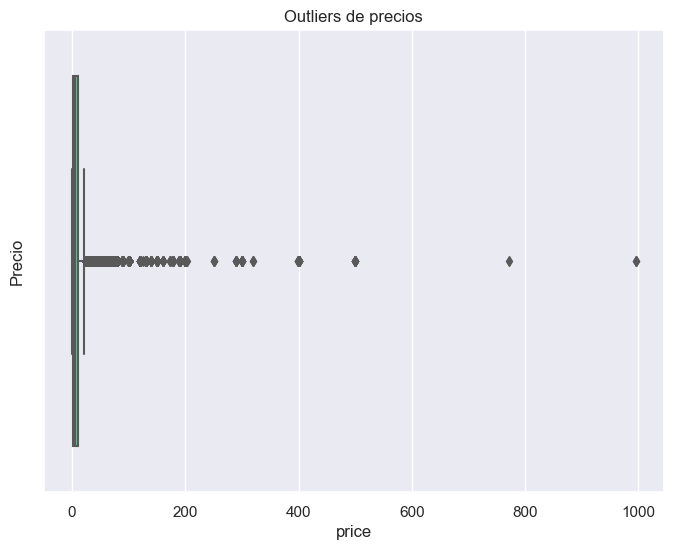

In [50]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='price', data=df, orient='vertical', palette='Set2')
plt.ylabel('Precio')
plt.title('Outliers de precios')
plt.show()

Esta grafica es muy diciente frente a el rango de precios y así mismo nos indica que como la mayoría de ellos esta por debajo de los 100 Usd y no hay una dispersión amplia, el precio no es un factor de incidencia importante.

4. Continuando con nuestro análisis de variables relevantes, veremos que tanto puede influir el acceso temprano early access para la recomendación.

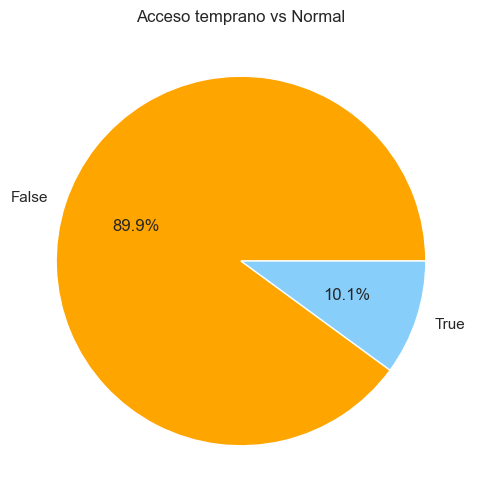

In [51]:
plt.figure(figsize=(6, 6))
df['early_access'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['orange', 'lightskyblue'])
plt.title('Acceso temprano vs Normal')
plt.ylabel('')
plt.show()

Únicamente el 10.1% de los juegos esta disponible en esta modalidad. Otra variable que por cuya distribución no es incidente pues no juega un valor determinante hablando del modelo Ítem a Item.

4. Ahora evaluaremos los desarrolladores de juegos

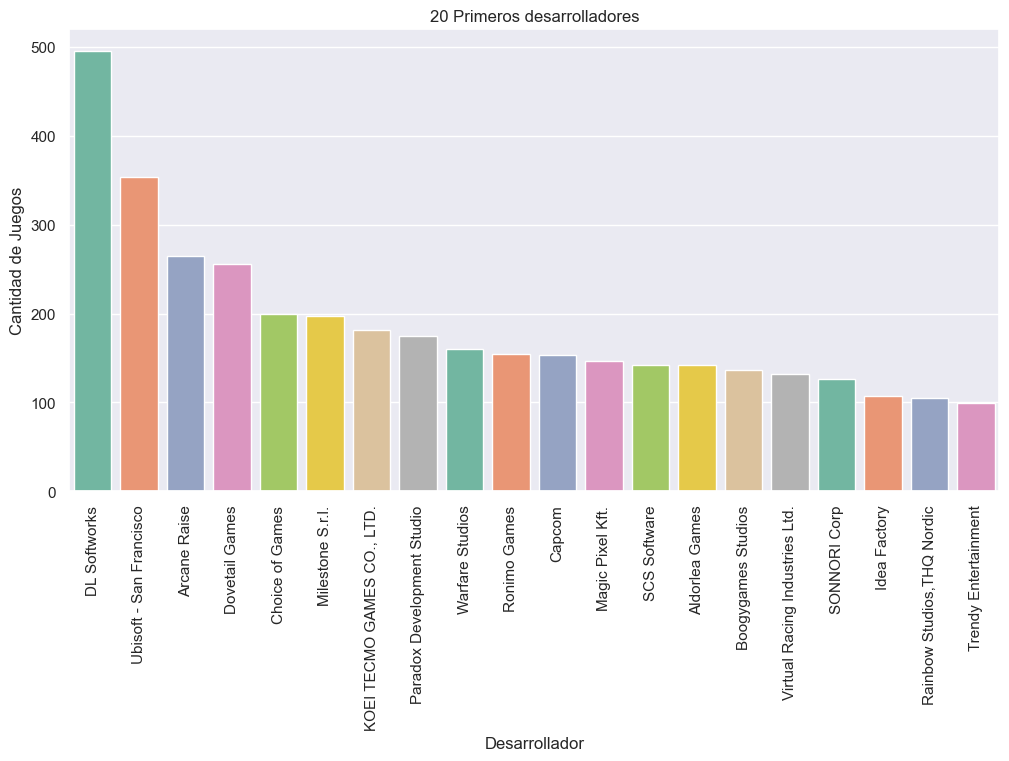

In [52]:
plt.figure(figsize=(12, 6))
sns.countplot(x='developer', data=df, palette='Set2', order=df['developer'].value_counts().index[:20])
plt.xticks(rotation=90)
plt.xlabel('Desarrollador')
plt.ylabel('Cantidad de Juegos')
plt.title('20 Primeros desarrolladores')
plt.show()


Es claro que la correspondencia de la recomendación girara en torno a la cantidad de desarrolladores, siendo mas probable que aquellos con mas cantidad juegos publicados mayor la probabilidad de el retorno de sus juegos se presente un nuestro modelo.

5. Relación desarrollador vs genero

<Figure size 1200x600 with 0 Axes>

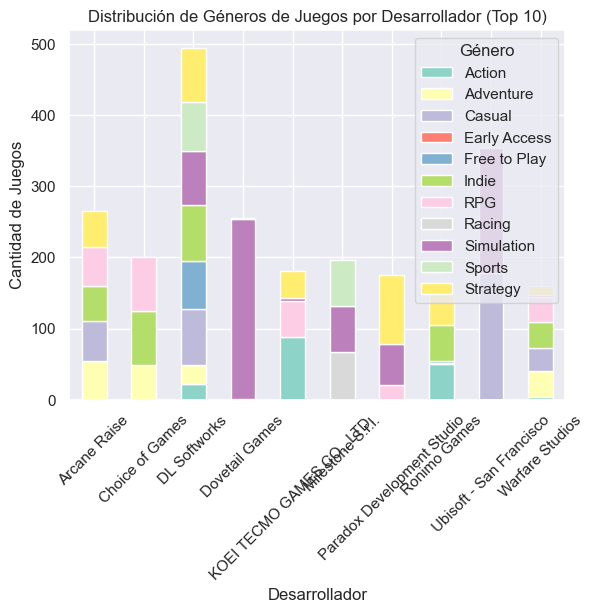

In [53]:
top10 = df['developer'].value_counts().head(10).index
filtro = df[df['developer'].isin(top10)]

relacion = pd.crosstab(filtro['developer'], filtro['genres'])

plt.figure(figsize=(12, 6))
relacion.plot(kind='bar', stacked=True, colormap='Set3')
plt.xticks(rotation=45)
plt.xlabel('Desarrollador')
plt.ylabel('Cantidad de Juegos')
plt.title('Distribución de Géneros de Juegos por Desarrollador (Top 10)')
plt.legend(title='Género')
plt.show()

Aunque vimos en el punto 4. que el desarrollador con mas juegos lanzados es DL softwares, hay desarrolladores con mayor distribución en cuanto a genero, esto de por si nos indica que aquellos con mas variedad pueden incidir fuertemente en la relación de recomendación pues tienen un rango mas amplio de selección y por lo tanto mas alternativas. 

<Figure size 1200x600 with 0 Axes>

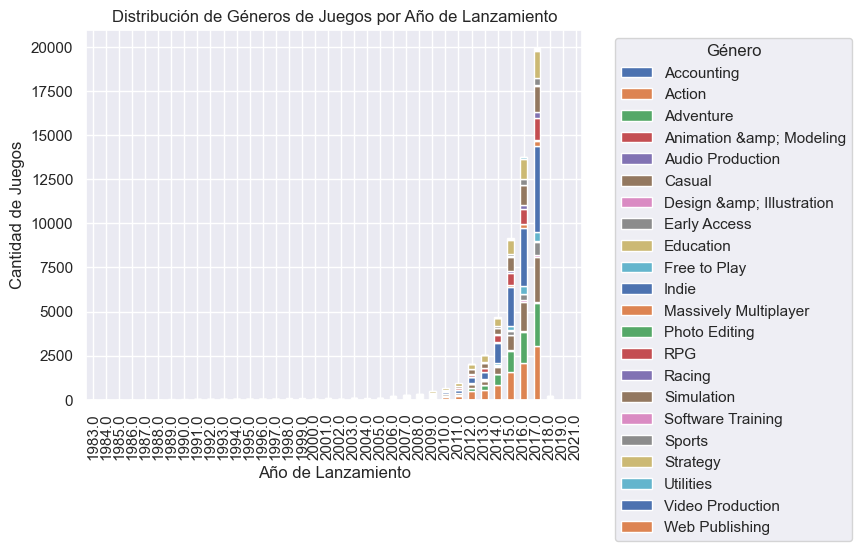

In [54]:
filtro = pd.crosstab(df['release_date_anio'], df['genres'])

plt.figure(figsize=(12, 6))
filtro.plot(kind='bar', stacked=True)
plt.xticks(rotation=90)
plt.xlabel('Año de Lanzamiento')
plt.ylabel('Cantidad de Juegos')
plt.title('Distribución de Géneros de Juegos por Año de Lanzamiento')
plt.legend(title='Género', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

Como podemos ver en la tendencia de juegos lanzados es creciente, esto indica que obtendremos sugerencias de juegos mas nuevos. Aunque sin duda en el entorno gaming hay clásicos de clásicos !!!. Por otra lado vemos un incremento de juegos de acción interesante a lo largo de los años que toma la muestra del dataset, indicando una preferencia clara de los usuarios y desarrolladores que ciertamente afecta nuestra sugerencia.

En conclusión, un modelo ítem a item sera mas preciso si se basa en el desarrollador y el genero, pues sugerirá para cada caso en particular al brindarse información de un item aquellos que mas se asemejen en términos de desarrollador y genero.

No debemos olvidar que en términos del gaming los desarrolladores pueden ser especializados o no serlos, por lo que es muy probable que un ítem de un desarrollador que esta muy especializado tienda a repetirse como recomendación. Por otro lado cuando se de un ítem desarrollado por una firma de creación mixta en términos de genero sugerira ítems que se asemejen mas y valgo la redundancia al genero.

Es importante también destacar que el precio no tiene mucha incidencia en la sugerencia, pues la dispersión de precios por ítem es baja y en su mayoría estan dentro de un rango de 5 USD a 30USD. El early Access aunque llamativo aparantemente no esta disponible para muchos juegos por lo que no alcanza a ser una muestra significativa que lo defina como factor a tener en cuenta.
